In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
nca_1_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T15/NCA_32Ah/NCA_1_cycledata.csv')
nca_2_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T15/NCA_32Ah/NCA_2_cycledata.csv')

In [228]:
charge_cap_col = 'Charge_Capacity (Ah)'
discharge_cap_col = 'Discharge_Capacity (Ah)'

nca_1_charge = list(nca_1_cycledata[charge_cap_col])
maxCap = nca_1_charge[0]
nca_1_charge[0] = 100
nca_cycle1 = list(nca_1_cycledata['Cycle_Index'])
end_idx_nca_1 = len(nca_1_charge)
for i in range(1, len(nca_1_charge)):
  if (nca_1_charge[i] > maxCap or nca_1_charge[i] == 0.0):
    nca_1_charge[i] = nca_1_charge[i - 1]
  else:
    nca_1_charge[i] = nca_1_charge[i] / maxCap * 100

nca_1_disc = list(nca_1_cycledata[discharge_cap_col])
for i in range(1, len(nca_1_disc)):
  if (nca_1_disc[i] > maxCap or nca_1_disc[i] == 0):
    nca_1_disc[i] = nca_1_disc[i - 1]

In [229]:
nca_2_charge = list(nca_2_cycledata[charge_cap_col])
maxCap = nca_2_charge[0]
nca_2_charge[0] = 100
nca_cycle2 = list(nca_2_cycledata['Cycle_Index'])
end_idx_nca_2 = len(nca_2_charge)
for i in range(1, len(nca_2_charge)):
  if (nca_2_charge[i] > maxCap or nca_2_charge[i] == 0.0):
    nca_2_charge[i] = nca_2_charge[i - 1]
  else:
    nca_2_charge[i] = nca_2_charge[i] / maxCap * 100

nca_2_disc = list(nca_2_cycledata[discharge_cap_col])
for i in range(1, len(nca_2_disc)):
  if (nca_2_disc[i] > maxCap or nca_2_disc[i] == 0):
    nca_2_disc[i] = nca_2_disc[i - 1]

In [240]:
nca_1 = len(nca_1_charge)
for i in range(nca_1):
  if nca_1_charge[i] <= 80:
    nca_1 = i + 1
    break

nca_2 = len(nca_2_charge)
for i in range(nca_2):
  if nca_2_charge[i] <= 80:
    nca_2 = i + 1
    break

In [231]:
nmc_1_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T15/NMC_3Ah/NMC_1_cycledata.csv')
nmc_2_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T15/NMC_3Ah/NMC_2_cycledata.csv')
charge_cap_col = 'Charge_Capacity (Ah)'
maxCap = 3
discharge_cap_col = 'Discharge_Capacity (Ah)'

In [232]:
nmc_1_charge = list(nmc_1_cycledata[charge_cap_col])
maxCap = nmc_1_charge[0]
nmc_1_charge[0] = 100
nmc_cycle1 = list(nmc_1_cycledata['Cycle_Index'])
for i in range(1, len(nmc_1_charge)):
  perc = abs(nmc_1_charge[i] / maxCap * 100 - nmc_1_charge[i - 1]) / nmc_1_charge[i - 1]
  if (nmc_1_charge[i] > maxCap or perc > 0.1):
    nmc_1_charge[i] = nmc_1_charge[i - 1]
  else:
    nmc_1_charge[i] = nmc_1_charge[i] / maxCap * 100

nmc_1_disc = list(nmc_1_cycledata[discharge_cap_col])
for i in range(1, len(nmc_1_disc)):
  perc = abs(nmc_1_disc[i] - nmc_1_disc[i - 1]) / nmc_1_disc[i - 1]
  if (nmc_1_disc[i] > maxCap or perc > 0.1):
    nmc_1_disc[i] = nmc_1_disc[i - 1]

In [233]:
nmc_2_charge = list(nmc_2_cycledata[charge_cap_col])
maxCap = nmc_2_charge[0]
nmc_2_charge[0] = 100
nmc_cycle2 = list(nmc_2_cycledata['Cycle_Index'])
for i in range(1, len(nmc_2_charge)):
  perc = abs(nmc_2_charge[i] / maxCap * 100 - nmc_2_charge[i - 1]) / nmc_2_charge[i - 1]
  if (nmc_2_charge[i] > maxCap or perc > 0.1):
    nmc_2_charge[i] = nmc_2_charge[i - 1]
  else:
    nmc_2_charge[i] = nmc_2_charge[i] / maxCap * 100

nmc_2_disc = list(nmc_2_cycledata[discharge_cap_col])
for i in range(1, len(nmc_2_disc)):
  perc = abs(nmc_2_disc[i] - nmc_2_disc[i - 1]) / nmc_2_disc[i - 1]
  if (nmc_2_disc[i] > maxCap or perc > 0.1):
    nmc_2_disc[i] = nmc_2_disc[i - 1]

In [241]:
nmc_1 = len(nmc_1_charge)
for i in range(nmc_1):
  if nmc_1_charge[i] <= 80:
    nmc_1 = i + 1
    break

nmc_2 = len(nmc_2_charge)
for i in range(nmc_2):
  if nmc_2_charge[i] <= 80:
    nmc_2 = i + 1
    break

In [235]:
lfp_1_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T25/LFP_11Ah/LFP_1_cycledata.csv')
lfp_2_cycledata = pd.read_csv('/content/drive/MyDrive/BTP/Datasets/SNL_18650/T25/LFP_11Ah/LFP_2_cycledata.csv')
charge_cap_col = 'Charge_Capacity (Ah)'
maxCap = 1.1
discharge_cap_col = 'Discharge_Capacity (Ah)'

In [236]:
lfp_1_charge = list(lfp_1_cycledata[charge_cap_col])
maxCap = lfp_1_charge[0]
lfp_1_charge[0] = 100
lfp_cycle1 = list(lfp_1_cycledata['Cycle_Index'])
end_idx_lfp_1 = len(lfp_1_charge)
for i in range(1, len(lfp_1_charge)):
  perc = abs(lfp_1_charge[i] / maxCap * 100 - lfp_1_charge[i - 1]) / lfp_1_charge[i - 1]
  if (lfp_1_charge[i] > maxCap or perc > 0.1):
    lfp_1_charge[i] = lfp_1_charge[i - 1]
  else:
    lfp_1_charge[i] = lfp_1_charge[i] / maxCap * 100

lfp_1_disc = list(lfp_1_cycledata[discharge_cap_col])
for i in range(1, len(lfp_1_disc)):
  perc = abs(lfp_1_disc[i] - lfp_1_disc[i - 1]) / lfp_1_disc[i - 1]
  if (lfp_1_disc[i] > maxCap or perc > 0.1):
    lfp_1_disc[i] = lfp_1_disc[i - 1]

In [237]:
lfp_2_charge = list(lfp_2_cycledata[charge_cap_col])
maxCap = lfp_2_charge[0]
lfp_2_charge[0] = 100
lfp_cycle2 = list(lfp_2_cycledata['Cycle_Index'])
end_idx_lfp_2 = len(lfp_2_charge)
for i in range(1, len(lfp_2_charge)):
  perc = abs(lfp_2_charge[i] / maxCap * 100 - lfp_2_charge[i - 1]) / lfp_2_charge[i - 1]
  if (lfp_2_charge[i] > maxCap or perc > 0.1):
    lfp_2_charge[i] = lfp_2_charge[i - 1]
  else:
    lfp_2_charge[i] = lfp_2_charge[i] / maxCap * 100

lfp_2_disc = list(lfp_2_cycledata[discharge_cap_col])
for i in range(1, len(lfp_2_disc)):
  perc = abs(lfp_2_disc[i] - lfp_2_disc[i - 1]) / lfp_2_disc[i - 1]
  if (lfp_2_disc[i] > maxCap or perc > 0.1):
    lfp_2_disc[i] = lfp_2_disc[i - 1]

In [246]:
lfp_1 = len(lfp_1_charge)
for i in range(lfp_1):
  if lfp_1_charge[i] <= 80:
    lfp_1 = i + 1
    break

lfp_2 = len(lfp_2_charge)
for i in range(lfp_2):
  if lfp_2_charge[i] <= 80:
    lfp_2 = i + 1
    break

lfp_1 = min(lfp_1, 500)
lfp_2 = min(lfp_2, 500)

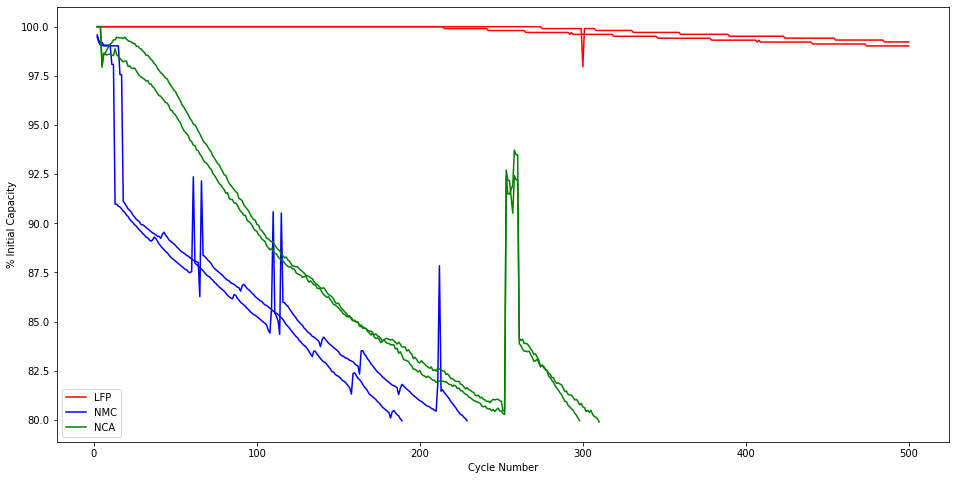

In [251]:
plt.figure(figsize=(16, 8))
plt.plot(lfp_cycle1[1: lfp_1], lfp_1_charge[1: lfp_1], 'r-', label='LFP')
plt.plot(lfp_cycle2[1: lfp_2], lfp_2_charge[1: lfp_2], 'r-')
plt.plot(nmc_cycle1[1: nmc_1], nmc_1_charge[1: nmc_1], 'b-', label='NMC')
plt.plot(nmc_cycle2[1: nmc_2], nmc_2_charge[1: nmc_2], 'b-')
plt.plot(nca_cycle1[1: nca_1], nca_1_charge[1: nca_1], 'g-', label='NCA')
plt.plot(nca_cycle2[1: nca_2], nca_2_charge[1: nca_2], 'g-')
plt.xlabel('Cycle Number')
plt.ylabel('% Initial Capacity')
plt.legend()
plt.show()